### 2023년_전국버스정류장 위치정보_데이터 전처리 및 시각화 ### 





In [47]:
import pandas as pd

bs_location = pd.read_csv("C:\\Users\\SAMSUNG\\Downloads\\2023년_전국버스정류장 위치정보_데이터.csv", encoding ="cp949")
bs_location.head()

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명
0,ADB354000076,신덕1리,36.524325,128.830926,2023-10-16,540076.0,37040,경상북도 안동시,안동
1,ADB354000077,나천,36.484444,128.876390,2023-10-16,540077.0,37040,경상북도 안동시,안동
2,ADB354000078,골삽실,36.462248,128.887606,2023-10-16,540078.0,37040,경상북도 안동시,안동
3,ADB354000079,금곡(길안),36.394360,128.933281,2023-10-16,540079.0,37040,경상북도 안동시,안동
4,ADB354000080,대사.토일,36.368580,128.940353,2023-10-16,540080.0,37040,경상북도 안동시,안동


In [48]:
bs_location

,정류장번호,정류장명,위도,경도,정보수집일,모바일단축번호,도시코드,도시명,관리도시명
0,ADB354000076,신덕1리,36.524325,128.830926,2023-10-16,540076.0,37040,경상북도 안동시,안동
1,ADB354000077,나천,36.484444,128.876390,2023-10-16,540077.0,37040,경상북도 안동시,안동
2,ADB354000078,골삽실,36.462248,128.887606,2023-10-16,540078.0,37040,경상북도 안동시,안동
3,ADB354000079,금곡(길안),36.394360,128.933281,2023-10-16,540079.0,37040,경상북도 안동시,안동
4,ADB354000080,대사.토일,36.368580,128.940353,2023-10-16,540080.0,37040,경상북도 안동시,안동
...,...,...,...,...,...,...,...,...,...
204204,USB196066514,새진흥아파트,35.540264,129.106553,2023-10-16,66514.0,26,울산광역시,울산
204205,USB196066515,부일맨션,35.539081,129.104984,2023-10-16,66515.0,26,울산광역시,울산
204206,USB196066516,부일맨션,35.539203,129.104913,2023-10-16,66516.0,26,울산광역시,울산
204207,USB196066601,석남유치원,35.562269,129.116000,2023-10-16,66601.0,26,울산광역시,울산


In [49]:
bs_location.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204209 entries, 0 to 204208
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   정류장번호    204209 non-null  object 
 1   정류장명     204207 non-null  object 
 2   위도       204207 non-null  float64
 3   경도       204207 non-null  float64
 4   정보수집일    204209 non-null  object 
 5   모바일단축번호  187350 non-null  float64
 6   도시코드     204209 non-null  int64  
 7   도시명      204209 non-null  object 
 8   관리도시명    204209 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.0+ MB


In [50]:
bs_location.isna().sum()

정류장번호          0
정류장명           2
위도             2
경도             2
정보수집일          0
모바일단축번호    16859
도시코드           0
도시명            0
관리도시명          0
dtype: int64

In [51]:
#표본 수에 비해 결측값이 매우 적음 -> 결측값을 제거하여 처리 

bs_location=bs_location.dropna()

In [52]:
bs_location.isna().sum()

정류장번호      0
정류장명       0
위도         0
경도         0
정보수집일      0
모바일단축번호    0
도시코드       0
도시명        0
관리도시명      0
dtype: int64

In [53]:
city_counts = bs_location.groupby('도시명').size()
print(city_counts)

도시명
강원특별자치도 강릉시      40
강원특별자치도 동해시     393
강원특별자치도 삼척시     147
강원특별자치도 속초시     215
강원특별자치도 양구군     216
               ... 
충청북도 증평군          4
충청북도 진천군        659
충청북도 청원군         28
충청북도 청주시       3225
충청북도 충주시       1993
Length: 158, dtype: int64


In [54]:
df_city_counts = city_counts.reset_index()
df_city_counts.columns = ['도시명', '값']
print(df_city_counts)


             도시명     값
0    강원특별자치도 강릉시    40
1    강원특별자치도 동해시   393
2    강원특별자치도 삼척시   147
3    강원특별자치도 속초시   215
4    강원특별자치도 양구군   216
..           ...   ...
153     충청북도 증평군     4
154     충청북도 진천군   659
155     충청북도 청원군    28
156     충청북도 청주시  3225
157     충청북도 충주시  1993

[158 rows x 2 columns]


In [55]:
df_city_counts.describe()

,값
count,158.000000
mean,1185.759494
std,1155.916993
min,1.000000
25%,429.500000
50%,885.500000
75%,1694.500000
max,8954.000000


###최소, 최대 차이: 8953 (매우 큼)###

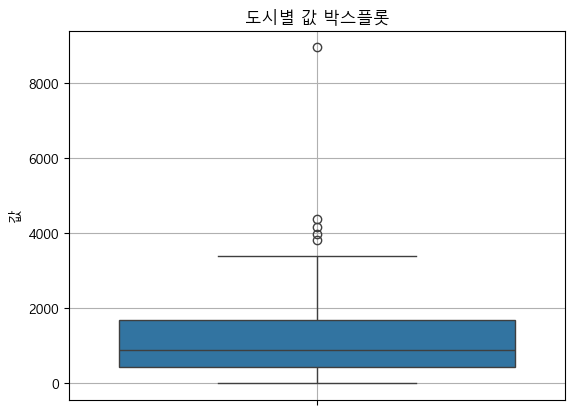

In [56]:
#boxplot으로 편차 시각화 => 접근성 차이 강조 

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df_city_counts['값'])
plt.title('도시별 값 박스플롯')
plt.ylabel('값')
plt.grid(True)
plt.show()

In [57]:
df_sorted = df_city_counts.sort_values(by="값",ascending=False)
print(df_sorted)

          도시명     값
97      인천광역시  8954
93      부산광역시  4386
90      대구광역시  4168
94      서울특별시  3970
96      울산광역시  3822
..        ...   ...
133  충청남도 금산군     4
144  충청남도 청양군     2
98   전라남도 강진군     2
59   경상남도 진해시     1
103  전라남도 담양군     1

[158 rows x 2 columns]


In [58]:
print(df_sorted.head(5),'\n')
print(df_sorted.tail(5))

      도시명     값
97  인천광역시  8954
93  부산광역시  4386
90  대구광역시  4168
94  서울특별시  3970
96  울산광역시  3822 

          도시명  값
133  충청남도 금산군  4
144  충청남도 청양군  2
98   전라남도 강진군  2
59   경상남도 진해시  1
103  전라남도 담양군  1


In [59]:
dh=df_sorted.head()
dt=df_sorted.tail()

In [60]:
combined_df = pd.concat([dh, dt])
print(combined_df)

          도시명     값
97      인천광역시  8954
93      부산광역시  4386
90      대구광역시  4168
94      서울특별시  3970
96      울산광역시  3822
133  충청남도 금산군     4
144  충청남도 청양군     2
98   전라남도 강진군     2
59   경상남도 진해시     1
103  전라남도 담양군     1


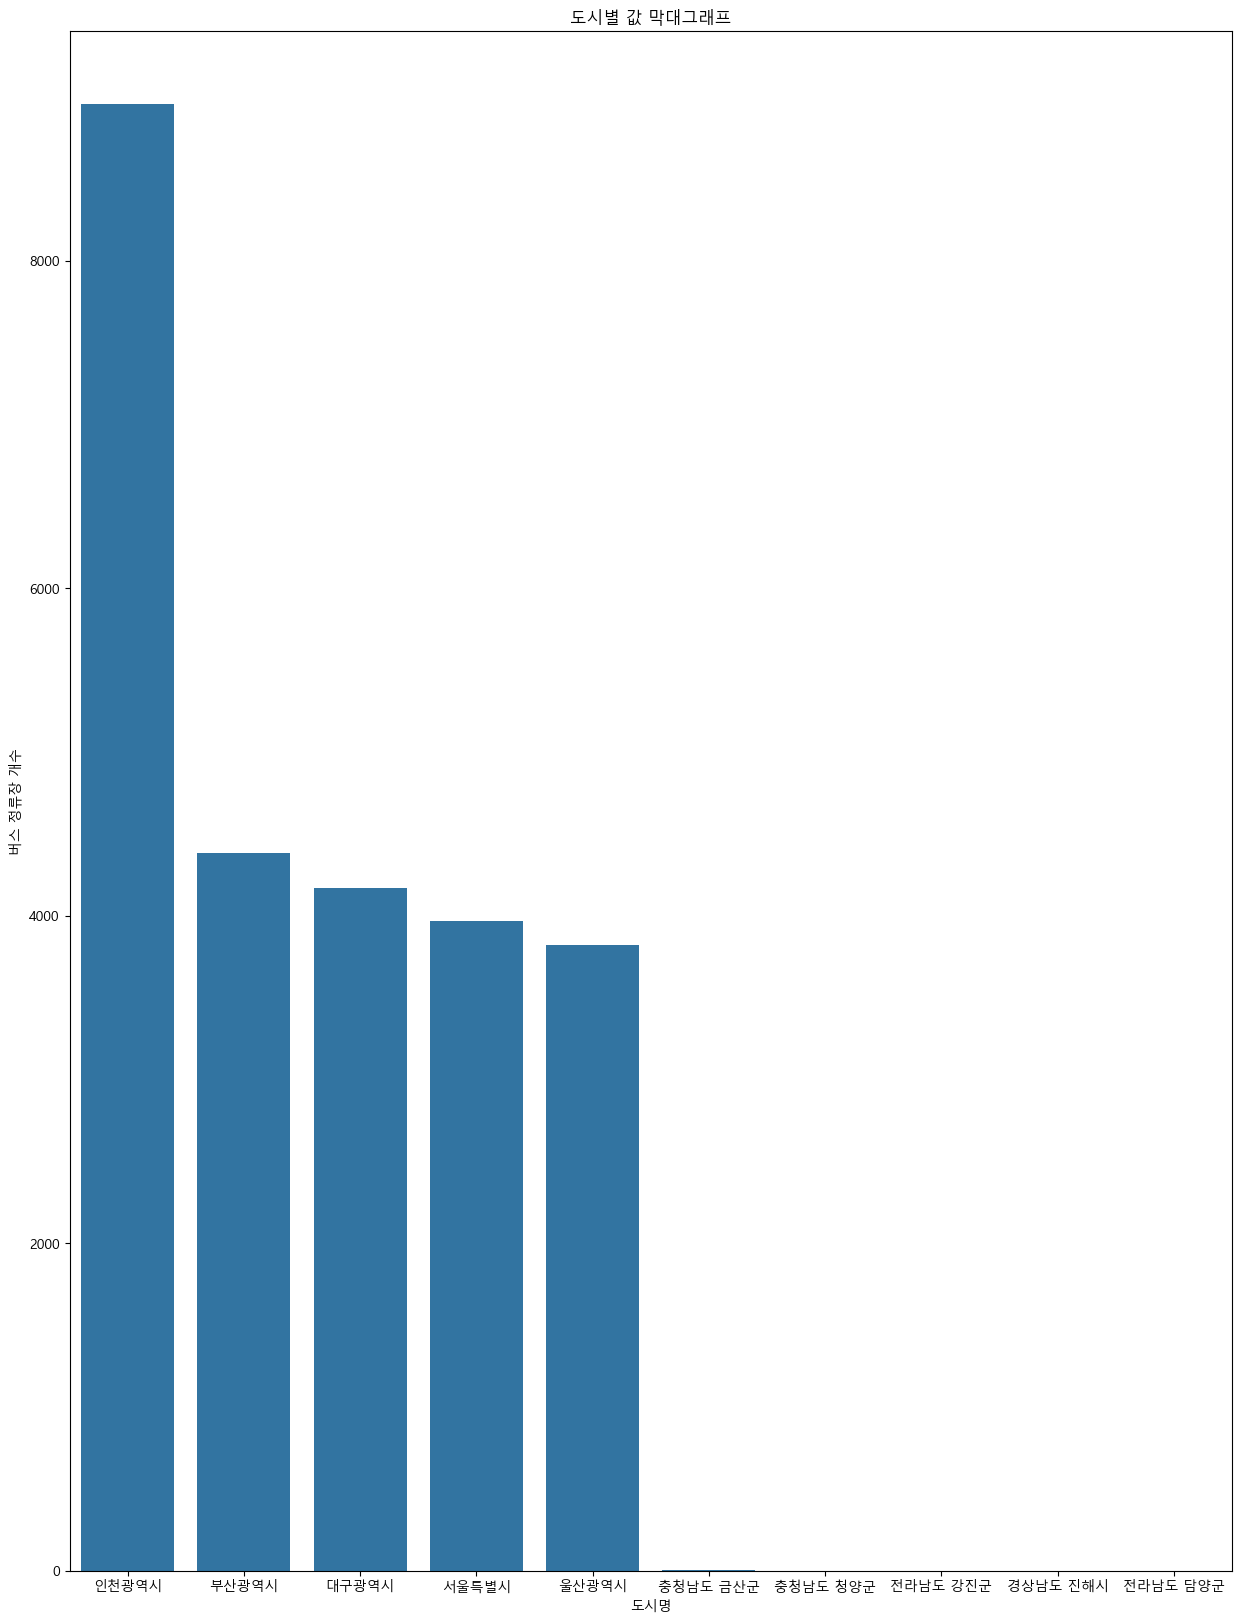

In [70]:
#상위5, 하위5 지역을 그룹핑하여 시각화 => 접근성 차이 강조 

#ver.1 하위그룹이 희미하게 보이긴 하지만, 그래프가 너무 길음 


import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,20))
bs=sns.barplot(x="도시명",y="값", data=combined_df)
plt.xticks(rotation=0)


plt.title("도시별 값 막대그래프")
plt.xlabel("도시명")
plt.ylabel("버스 정류장 개수")


plt.show()

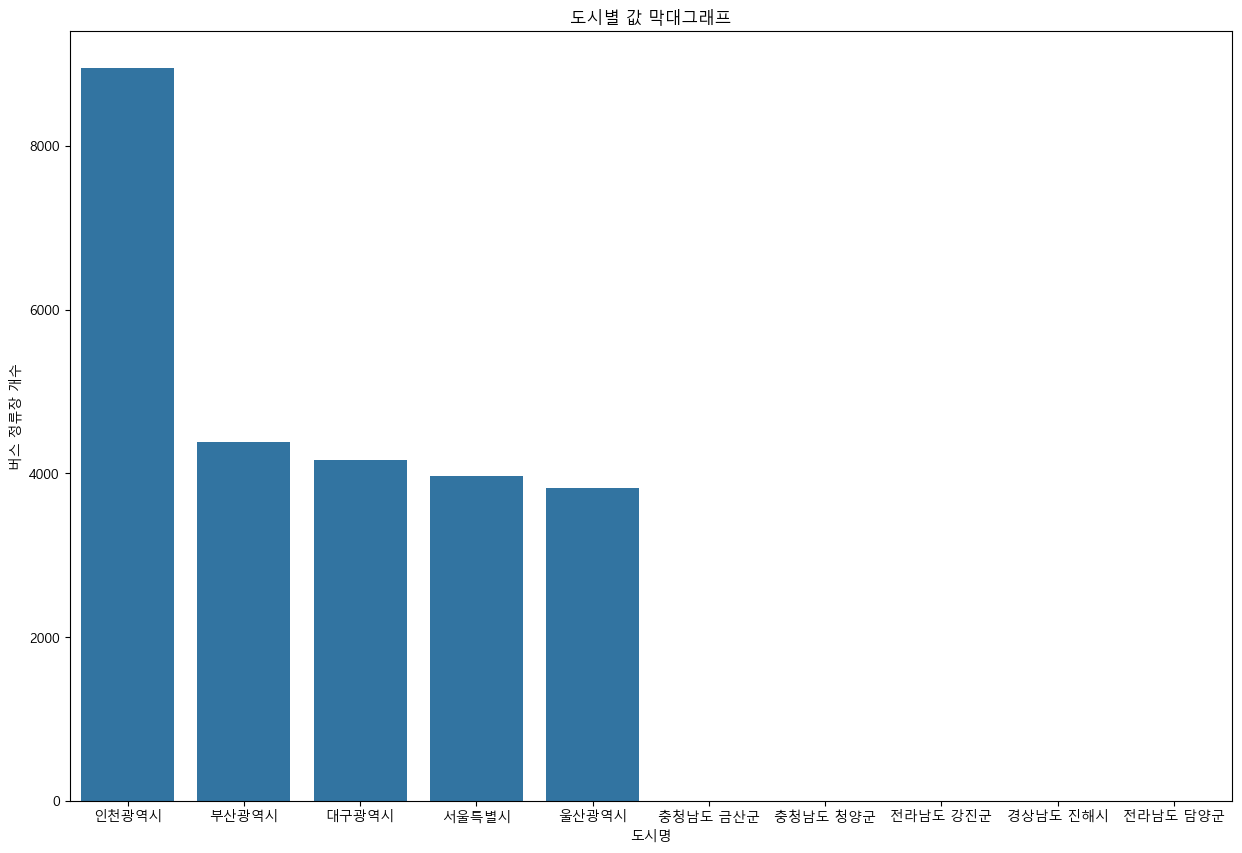

In [71]:
#ver.2 그래프의 크기는 깔끔한데, 하위그룹이 아예 안 보임 


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,10))
bs=sns.barplot(x="도시명",y="값", data=combined_df)
plt.xticks(rotation=0)


plt.title("도시별 값 막대그래프")
plt.xlabel("도시명")
plt.ylabel("버스 정류장 개수")


plt.show()

#insight 

1. 상위 몇몇 도시가 전체 분포를 지배한다

-최대값이 8954로, 평균(1185)의 약 7.5배

-데이터 분포가 심하게 왜곡되어 있다 (오른쪽 꼬리 길다)
평균(1185) > 중앙값(885.5) → 우측 왜도 (skewed right) 존재


=> 상위 몇 도시가 값의 대부분을 차지하고 나머지 도시들은 훨씬 낮은 값을 가짐 → 불균형 심각


2. 대다수 도시는 중하위 수준에 몰려 있다
75% 지점이 1700 미만 → 전체 도시 중 75%는 값이 1694 이하

즉, 값이 2000~9000 사이인 도시는 극히 일부에 불과


3. 정책·자원 분배에 있어서 상위 도시와 하위 도시 간 격차 조정 필요
